In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
"""
Creating dummy dataset
"""

In [9]:
time = np.arange(0, 1500)

In [10]:
time.shape

(1500,)

In [11]:
y = np.sin(0.02 * time)

In [12]:
y_noise = np.sin(0.02 * time) + np.random.uniform(low=-1, high=1, size=(1500,))

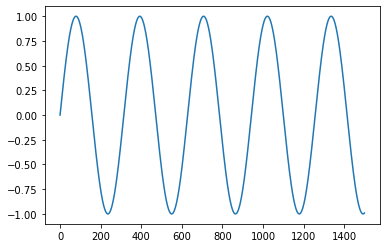

In [13]:
plt.plot(y)

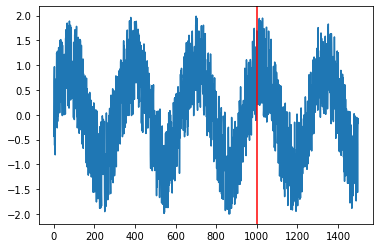

In [20]:
plt.plot(y_noise)
plt.axvline(1000, color="red")

In [16]:
y_noise

array([-0.43429012, -0.32442284,  0.6798175 , ..., -0.48566613,
       -0.07512574, -0.17264681])

In [17]:
yTarget = y_noise

In [18]:
yTarget.shape

(1500,)

In [ ]:
"""
Preparing the time series/ Sequence dataset for RNN model.
"""

In [21]:
# Split training and testing data
train = yTarget[0:1000]
test = yTarget[1000:]

In [22]:
train.shape

(1000,)

In [23]:
test.shape

(500,)

In [24]:
# This many times will the below loop will run
len(train) - 10

990

In [28]:
# Setting 10 steps as one observation
# first 10 values starting from the first element will be first (x) and  11th value will be y
# second 10 values starting from the second element will be second (x) and 12th value will be y


def createDS(data, step):
    X = []
    y = []

    for i in range(len(data) - step):
        X.append(data[i:i+step])
        y.append(data[i+step])
    return np.array(X), np.array(y)

In [30]:
# Creating train dataset
trainX, trainY = createDS(train, 10)

In [31]:
trainX.shape

(990, 10)

In [32]:
trainY.shape

(990,)

In [33]:
trainX

array([[-0.43429012, -0.32442284,  0.6798175 , ..., -0.8065417 ,
         0.71532268,  0.38603518],
       [-0.32442284,  0.6798175 ,  0.96691894, ...,  0.71532268,
         0.38603518,  0.55283108],
       [ 0.6798175 ,  0.96691894, -0.61496264, ...,  0.38603518,
         0.55283108,  0.65649989],
       ...,
       [ 1.7409081 ,  0.18205268,  0.9585691 , ...,  1.08735835,
        -0.11190275, -0.0496091 ],
       [ 0.18205268,  0.9585691 ,  0.5943091 , ..., -0.11190275,
        -0.0496091 ,  1.37190215],
       [ 0.9585691 ,  0.5943091 ,  1.25985304, ..., -0.0496091 ,
         1.37190215,  0.40897661]])

In [34]:
# Creating test dataset
testX, testY = createDS(test, 10)

In [35]:
testX.shape

(490, 10)

In [36]:
testY.shape

(490,)

In [ ]:
"""
Creating the RNN model
"""

In [39]:
from keras.models import Sequential
from keras.layers import Dense

# For RNN layer that will have short term memory
from keras.layers import SimpleRNN

In [40]:
model = Sequential()

In [41]:
# Adding simple RNN layer
model.add(
    SimpleRNN(
        units=1, 
        activation='tanh'
    )
)

In [42]:
model.add(
    Dense(
        units=1, 
        activation='linear' 
    )
)

In [43]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'SimpleRNN',
   'config': {'name': 'simple_rnn',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': False,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 1,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'recurrent_constraint': None,
    'bias_constraint': None,
    'dropout': 0.0,
    'recurrent_dropout': 0.0}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',

In [44]:
model.compile(loss='mean _squared_error', optimizer='rmsprop')

In [45]:
model.fit(trainX, trainY, epochs=500)

Epoch 1/500


ValueError: in user code:

    /home/prateek/.local/lib/python3.9/site-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /home/prateek/.local/lib/python3.9/site-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /home/prateek/.local/lib/python3.9/site-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /home/prateek/.local/lib/python3.9/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/prateek/.local/lib/python3.9/site-packages/keras/engine/input_spec.py:212 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 10)
